In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 128
pylab.rcParams['figure.figsize'] = 12, 12

Populating the interactive namespace from numpy and matplotlib


In [2]:
# ask where saturn is
# given bounds, how to render a star chart
# how to add lines to the star chart
# star chart colors

In [15]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [4]:
from skyfield.api import load

In [5]:
planets = load('de421.bsp')
earth, saturn = planets['earth'], planets['saturn barycenter']

In [6]:
ts = load.timescale()

In [7]:
t = ts.utc(2017, 1, range(365 * 3))

In [8]:
e = earth.at(t)
p = e.observe(saturn)

In [9]:
from skyfield import projections, charting

In [10]:
from skyfield.data import hipparcos
h = hipparcos.load_dataframe('hip_main.dat.gz')

1.1256687641143799


In [11]:
h.head()

,magnitude,ra_degrees,dec_degrees,ra_hours
hip,,,,
1,9.10,0.000912,1.089013,0.000061
2,9.27,0.003797,-19.498837,0.000253
3,6.61,0.005008,38.859286,0.000334
4,8.06,0.008382,-51.893546,0.000559
5,8.55,0.009965,-40.591224,0.000664


from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.
x = np.arange(0, 20, 0.1)
ax.scatter(x, x + np.random.normal(0, 3.0, len(x)))
line, = ax.plot(x, x - 5, 'r-', linewidth=2)

def update(i):
    label = 'timestep {0}'.format(i)
    print(label)
    # Update the line and the axes (with a new xlabel). Return a tuple of
    # "artists" that have to be redrawn for this frame.
    line.set_ydata(x - 5 + i)
    ax.set_xlabel(label)
    return line, ax

    # animating over 10 frames, with an interval of 200ms between frames.
anim = FuncAnimation(fig, update, frames=np.arange(0, 10), interval=200)
anim.save('line.gif', dpi=80, writer='imagemagick')
plt.close()

In [60]:
project = projections.build_stereographic_projection(p)
x, y = project(p)

fig, ax = plt.subplots()
#print(fig.canvas.supports_blit)
planet, = ax.plot(x[100], y[100], 'ro') #, animated=True)
blue_art = ax.plot(x, y, color='b')

print(ax.collections)
star_art = charting._plot_stars(h, e, project, ax, 6.0, 8.0, 0.8)
print(star_art)
print(ax.collections)

fig.canvas.draw()
#planet.draw()
background = fig.canvas.copy_from_bbox(ax.bbox)

del ax.collections[:2]
print(ax.collections)

#def init():
#    return planet, #blue_art, star_art
#gcf())
#background = fig.canvas.copy_from_bbox(ax.bbox)

def update(i):
    print(i, end=" ")
    fig.canvas.restore_region(background)
    planet.set_xdata(x[i+100])
    planet.set_ydata(y[i+100])
    #fig.canvas.blit(ax.bbox)
    return planet,

anim = FuncAnimation(fig, update, frames=5) #, #interval=50,
                    #init_func=init, blit=True)
plt.close()
#anim.save('line.gif', dpi=80, writer='imagemagick')
HTML(anim.to_html5_video())

[]
First star group: 5044
Second star group: 36367
[<matplotlib.collections.PathCollection object at 0x7fe0ca74e7b8>, <matplotlib.collections.PathCollection object at 0x7fe0ca74e518>]
[<matplotlib.collections.PathCollection object at 0x7fe0ca74e7b8>, <matplotlib.collections.PathCollection object at 0x7fe0ca74e518>]
========= 0.06189465522766113
========= 0.33005809783935547
[]
0 

AttributeError: 'FuncAnimation' object has no attribute '_blit_cache'

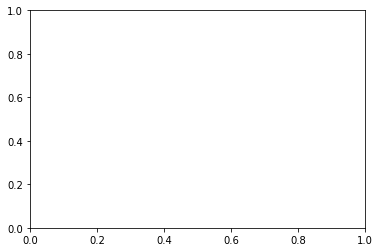

In [13]:
background
fig, ax = plt.subplots()
fig.canvas.restore_region(background)
background

In [58]:
fig, ax = plt.subplots()
print(fig.canvas.supports_blit)
project = projections.build_stereographic_projection(p)
x, y = project(p)
planet = ax.plot(x[100], y[100], 'ro', animated=True)
blue_art = ax.plot(x, y, color='b')
star_art = charting._plot_stars(h, e, project, ax, 6.0, 8.0, 0.8)

def init():
    #return blue_art
    #return blue_art + star_art #blue_art, star_art
    #return blue_art + star_art + planet
    return planet
#gcf())
#background = fig.canvas.copy_from_bbox(ax.bbox)

def update(i):
    print(i, end=" ")
    planet[0].set_xdata(x[i+100])
    planet[0].set_ydata(y[i+100])
    #planet.set_data(x[i], y[i])
    return planet

anim = FuncAnimation(fig, update, frames=4, interval=50,
                    init_func=init, blit=True)
plt.close()
#anim.save('line.gif', dpi=80, writer='imagemagick')
from time import time
t0 = time()
html = anim.to_html5_video()
print(time() - t0)
HTML(html)

True
First star group: 5044
Second star group: 36367
True
========= 0.0591120719909668
========= 0.38260865211486816
0 True
========= 0.04189252853393555
========= 0.318403959274292


NameError: name 'asdf' is not defined

In [28]:
print(star_art)

[<matplotlib.collections.PathCollection object at 0x7fe0cae0ceb8>, <matplotlib.collections.PathCollection object at 0x7fe0cae0ccc0>]


In [31]:
dir(star_art[0])
star_art[0].draw

<bound method _CollectionWithSizes.draw of <matplotlib.collections.PathCollection object at 0x7fe0cae0ceb8>>

In [27]:
print(type(fig.canvas))
print(type(fig.canvas.renderer))
print(type(fig.canvas.renderer._renderer))

<class 'matplotlib.backends.backend_agg.FigureCanvasAgg'>
<class 'matplotlib.backends.backend_agg.RendererAgg'>
<class 'matplotlib.backends._backend_agg.RendererAgg'>


In [26]:
type(fig.canvas.renderer._renderer)

matplotlib.backends._backend_agg.RendererAgg

In [12]:
from IPython.display import HTML
HTML("<b>hi</b>")

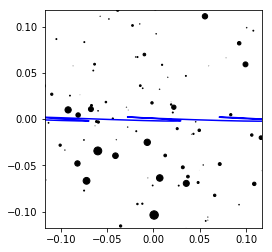

In [13]:
project = projections.build_stereographic_projection(p)
x, y = project(p)
plot(x, y, color='b')
charting._plot_stars(h, e, project, gca(), 6.0, 6.0, 0.8) #gcf())

In [183]:
import imageio

In [184]:
images = []

In [185]:
imageio.mimsave('movie.gif', images)

RuntimeError: Zero images were written.

In [217]:
tau = 2.0 * pi

In [218]:
from skyfield.data import hipparcos

In [227]:
#%%time
h = hipparcos.load_dataframe('hip_main.dat.gz')

1.002734661102295


In [228]:
h.head()

,magnitude,ra_hours,dec_degrees
hip,,,
1,9.10,0.000912,1.089013
2,9.27,0.003797,-19.498837
3,6.61,0.005008,38.859286
4,8.06,0.008382,-51.893546
5,8.55,0.009965,-40.591224


In [229]:
from skyfield import api

In [272]:
t = h
t = t
t = t[t['magnitude'] < 6.0]
c = t.loc[42911]
s = api.Star(ra_hours=c.ra_hours,
             dec_degrees=c.dec_degrees)
from skyfield.positionlib import Barycentric
ts = api.load.timescale()
o = Barycentric([0,0,0], [0,0,0], t=ts.tt(api.T0))
x = o.observe(s)

In [231]:
ss = api.Star(ra_hours=t.ra_hours,
              dec_degrees=t.dec_degrees)

In [37]:
xx = o.observe(ss)

In [38]:
xx.position.au.shape

(3, 4995)

In [75]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [39]:
#xx.separation_from(x)

In [40]:
ra0, dec0, distance = x.radec()

In [41]:
zz = xx.rotate_to(x)
zz.shape

(3, 4995)

In [42]:
from skyfield.functions import to_polar
r, theta, phi = to_polar(zz)
#out = tau / 4 - r

(0, 0.08726646259971647)

/home/brandon/.v/src-astronomy-notebooks/lib/python3.6/site-packages/matplotlib/projections/polar.py:67: RuntimeWarning: invalid value encountered in less
  mask = r < 0


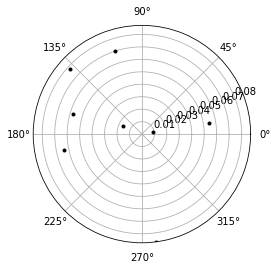

In [43]:
ax = subplot(111, projection='polar')
ax.plot(phi, tau/4 - theta, 'k.')#, markersize=t['magnitude'])
ax.set_ylim([0, 5 * tau / 360])

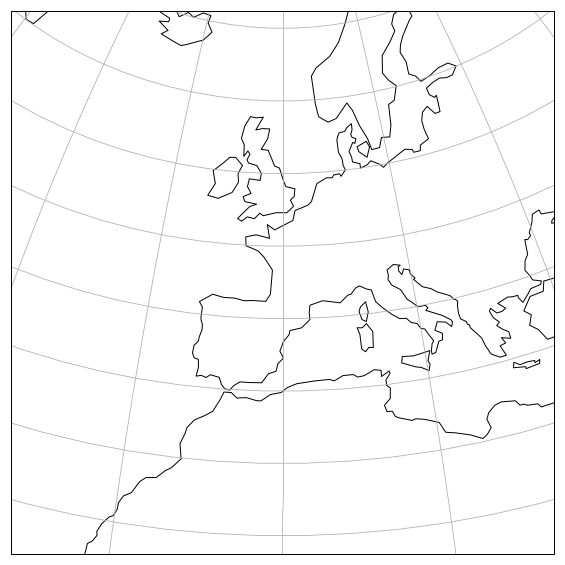

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

width = 5000000.0
height = 5000000.0

plt.figure(figsize=(10, 10))
projection=ccrs.AzimuthalEquidistant(
    central_latitude=45,
    central_longitude=0,
)
ax = plt.axes(projection=projection)
ax.set_extent([-width/2., width/2., -height/2., height/2.],
                          crs=projection)
ax.coastlines(resolution='110m')
ax.gridlines()

4995


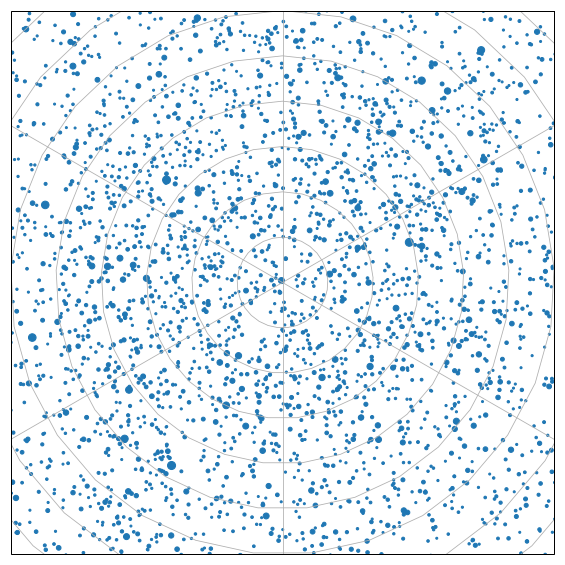

In [73]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

width = 20e6
height = width

globe = ccrs.Globe(ellipse='sphere')

plt.figure(figsize=(10, 10))
projection=ccrs.AzimuthalEquidistant(
    central_latitude=90,
    central_longitude=0,
    globe=globe,
)
ax = plt.axes(projection=projection)
ax.set_extent([-width/2., width/2., -height/2., height/2.],
                          crs=projection)
#ax.coastlines(resolution='110m')
ax.gridlines()
#ax.gridlines(draw_labels=True)

tr = ccrs.Geodetic()

ra, dec, distance = xx.radec()
#ax.plot(ra._degrees, dec.degrees, '.', transform=tr)
m = (8 - t.magnitude) ** 2.0
ax.scatter(ra._degrees, dec.degrees, m, transform=tr)
#ax.plot([0,0], [90,80], '.', transform=tr)
#ax.scatter([0,0], [90,80], transform=tr)
print(len(ra._degrees))

In [74]:
import astropy

ModuleNotFoundError: No module named 'astropy'

In [4]:
import ephem
from ephem.stars import stars

ModuleNotFoundError: No module named 'ephem'

In [5]:
len(stars)

NameError: name 'stars' is not defined

In [6]:
starlist = stars.values()

NameError: name 'stars' is not defined

In [7]:
for star in starlist:
    star.compute('2012/1/10')

NameError: name 'starlist' is not defined

In [8]:
degree = tau / 360.0
hour = tau / 24.0

ra_list = [star.ra / hour for star in starlist]
dec_list = [star.dec / degree for star in starlist]

NameError: name 'starlist' is not defined

In [9]:
scatter(ra_list, dec_list)
gca().invert_xaxis()

NameError: name 'ra_list' is not defined

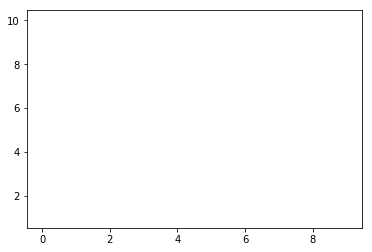

In [10]:
import matplotlib.animation as animation
fig = plt.figure()
ims = []
for i in range(10):
    x = i
    y = i + 1
    im = plt.plot([x], [y], animated=True)
    ims.append(im)
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
plt.show()

In [11]:
scatter(ra_list, dec_list)
axis([7.5, 3.5, -20, 20])

NameError: name 'ra_list' is not defined

In [ ]:
orion_axes = [7.5, 3.5, -20, 20]

In [ ]:
print starlist[0].name
print starlist[0].mag
print starlist[0]._spect

In [12]:
[star.mag for star in starlist[:5]]

NameError: name 'starlist' is not defined

In [13]:
mag_array = np.array([ star.mag for star in starlist ])
mag_array[:5]

NameError: name 'starlist' is not defined

In [14]:
size_array = (5 - mag_array) ** 1.5 * 4
size_array[:5]

NameError: name 'mag_array' is not defined

In [15]:
scatter(ra_list, dec_list, size_array)
axis(orion_axes)

NameError: name 'ra_list' is not defined

In [16]:
spectral_list = [star._spect for star in starlist]
spectral_list[:10]

NameError: name 'starlist' is not defined

In [17]:
from spectral_classification import build_color_chart
color_chart = build_color_chart('starcolors.txt')

In [18]:
color_list = [color_chart[spectral_class + '(V)']
              for spectral_class in spectral_list]

NameError: name 'spectral_list' is not defined

In [19]:
scatter(ra_list, dec_list, size_array, color_list)
axis(orion_axes)

NameError: name 'ra_list' is not defined

In [20]:
def pretty_hours(h, pos=None):
    if h % 1.0 == 0.0:
        return '{:.0g}h'.format(h)
    else:
        return '{:.2g}h'.format(h)

def pretty_degrees(d, pos=None):
    return u'{}°'.format(d)

print pretty_hours(3.5)
print pretty_hours(5.0)
print pretty_degrees(125)
print pretty_degrees(360)

SyntaxError: invalid syntax (<ipython-input-20-b06de0c05dc9>, line 10)

In [21]:
from matplotlib.ticker import FuncFormatter

hours_formatter = FuncFormatter(pretty_hours)
degrees_formatter = FuncFormatter(pretty_degrees)

NameError: name 'pretty_hours' is not defined

In [22]:
scatter(ra_list, dec_list, size_array, color_list)
axis(orion_axes)
gca().xaxis.set_major_formatter(hours_formatter)
gca().yaxis.set_major_formatter(degrees_formatter)

NameError: name 'ra_list' is not defined

In [23]:
scatter(ra_list, dec_list, size_array, color_list)
axis(orion_axes)
gca().xaxis.set_major_formatter(hours_formatter)
gca().yaxis.set_major_formatter(degrees_formatter)
gca().xaxis.grid(True)
gca().yaxis.grid(True)

NameError: name 'ra_list' is not defined

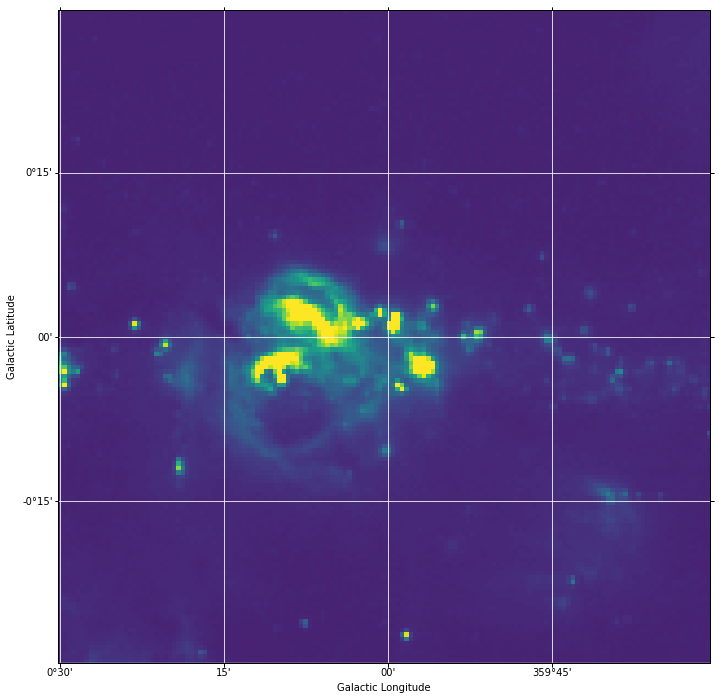

In [189]:
import matplotlib.pyplot as plt

from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

filename = get_pkg_data_filename('galactic_center/gc_msx_e.fits')

hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

plt.subplot(projection=wcs)
plt.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')
plt.grid(color='white', ls='solid')
plt.xlabel('Galactic Longitude')
plt.ylabel('Galactic Latitude')

In [109]:
wcs.wcs.crval = [1, 1]
wcs.wcs_pix2world([[0,0]], 1)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 1.0  1.0  
CRPIX : 75.907  74.8485  
NAXIS : 149  149

In [110]:
wcs.wcs.crval = [2, 2]
wcs.wcs_pix2world([[0,0]], 1)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 2.0  2.0  
CRPIX : 75.907  74.8485  
NAXIS : 149  149

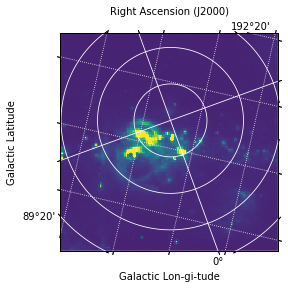

In [116]:
# http://docs.astropy.org/en/stable/wcs/

#w.wcs.crval = [0, -90]
wcs.wcs.crval = [20, 89.9]

ax = plt.subplot(projection=wcs)
#ax = plt.subplot(projection=w)

ax.imshow(hdu.data, vmin=-2.e-5, vmax=2.e-4, origin='lower')

print(ax.coords)

ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Lon-gi-tude')
ax.coords[1].set_axislabel('Galactic Latitude')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')

In [81]:
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 0.0  0.0  
CRPIX : 75.907  74.8485  
NAXIS : 149  149

In [85]:
' '.join(dir(wcs))

'__class__ __copy__ __deepcopy__ __delattr__ __dict__ __dir__ __doc__ __eq__ __format__ __ge__ __getattribute__ __getitem__ __gt__ __hash__ __init__ __init_subclass__ __iter__ __le__ __lt__ __module__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ __weakref__ _all_pix2world _all_world2pix _array_converter _as_mpl_axes _denormalize_sky _det2im _fix_ctype _fix_scamp _get_naxis _naxis _naxis1 _naxis2 _normalize_sky _p4_pix2foc _pix2foc _read_d2im_old_format _read_det2im_kw _read_distortion_kw _read_sip_kw _remove_sip_kw _write_det2im _write_distortion_kw _write_sip_kw all_pix2world all_world2pix axis_type_names calc_footprint celestial copy cpdis1 cpdis2 deepcopy det2im det2im1 det2im2 dropaxis fix footprint_to_file get_axis_types has_celestial is_celestial naxis p4_pix2foc pix2foc pixel_scale_matrix printwcs reorient_celestial_first sip sip_foc2pix sip_pix2foc slice sub swapaxes to_fits to_header to_header_string wcs wcs_pix2world wcs_wor

In [87]:
w = wcs.wcs

In [89]:
' '.join(dir(w))

'__class__ __copy__ __deepcopy__ __delattr__ __dir__ __doc__ __eq__ __format__ __ge__ __getattribute__ __gt__ __hash__ __init__ __init_subclass__ __le__ __lt__ __ne__ __new__ __reduce__ __reduce_ex__ __repr__ __setattr__ __sizeof__ __str__ __subclasshook__ alt axis_types bounds_check cd cdelt cdfix cel_offset celfix cname colax colnum compare crder crota crpix crval csyer ctype cubeface cunit cylfix dateavg dateobs datfix equinox fix get_cdelt get_pc get_ps get_pv has_cd has_cdi_ja has_crota has_crotaia has_pc has_pci_ja imgpix_matrix is_unity lat latpole lattyp lng lngtyp lonpole mix mjdavg mjdobs name naxis obsgeo p2s pc phi0 piximg_matrix print_contents radesys restfrq restwav s2p set set_ps set_pv spcfix spec specsys sptr ssysobs ssyssrc sub tab theta0 to_header unitfix velangl velosys velref zsource'

In [93]:
type(w)

astropy.wcs.Wcsprm

In [94]:
import numpy as np
from astropy import wcs
from astropy.io import fits

# Create a new WCS object.  The number of axes must be set
# from the start
w = wcs.WCS(naxis=2)

# Set up an "Airy's zenithal" projection
# Vector properties may be set with Python lists, or Numpy arrays
w.wcs.crpix = [-234.75, 8.3393]
w.wcs.cdelt = np.array([-0.066667, 0.066667])
w.wcs.crval = [0, -90]
w.wcs.ctype = ["RA---AIR", "DEC--AIR"]
w.wcs.set_pv([(2, 1, 45.0)])

# Some pixel coordinates of interest.
pixcrd = np.array([[0, 0], [24, 38], [45, 98]], np.float_)

# Convert pixel coordinates to world coordinates
world = w.wcs_pix2world(pixcrd, 1)
print(world)

# Convert the same coordinates back to pixel coordinates.
pixcrd2 = w.wcs_world2pix(world, 1)
print(pixcrd2)

# These should be the same as the original pixel coordinates, modulo
# some floating-point error.
assert np.max(np.abs(pixcrd - pixcrd2)) < 1e-6

# Now, write out the WCS object as a FITS header
header = w.to_header()

# header is an astropy.io.fits.Header object.  We can use it to create a new
# PrimaryHDU and write it to a file.
hdu = fits.PrimaryHDU(header=header)

[[267.96547027 -73.73660749]
 [276.53931377 -71.97412809]
 [287.77080792 -69.67813884]]
[[ 1.16529009e-12 -2.80664381e-13]
 [ 2.40000000e+01  3.80000000e+01]
 [ 4.50000000e+01  9.80000000e+01]]


In [150]:
from scipy import misc

In [151]:
image = misc.imread('/home/brandon/Downloads/magnitudes.png')

/home/brandon/.v/src-astronomy-notebooks/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


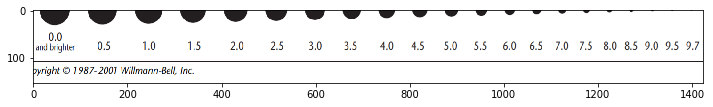

In [155]:
imshow(image)

In [158]:
row = image[0]
len(row)

1423

In [165]:
red = row[:,0]
white = (red == 255)
black = (red < 255)

In [173]:
starts, = where(white[:-1] & black[1:])
starts

array([  12,  115,  215,  311,  403,  492,  576,  656,  732,  804,  873,
        938, 1000, 1058, 1114, 1167, 1217, 1264, 1310, 1353, 1394])

In [174]:
endings, = where(black[:-1] & white[1:])
endings

array([  79,  178,  275,  368,  456,  540,  620,  697,  769,  838,  903,
        965, 1024, 1079, 1132, 1182, 1230, 1276, 1319, 1361, 1401])

In [177]:
diameters = endings - starts
diameters

array([67, 63, 60, 57, 53, 48, 44, 41, 37, 34, 30, 27, 24, 21, 18, 15, 13,
       12,  9,  8,  7])

In [180]:
mag = arange(0.0, 10.1, 0.5)

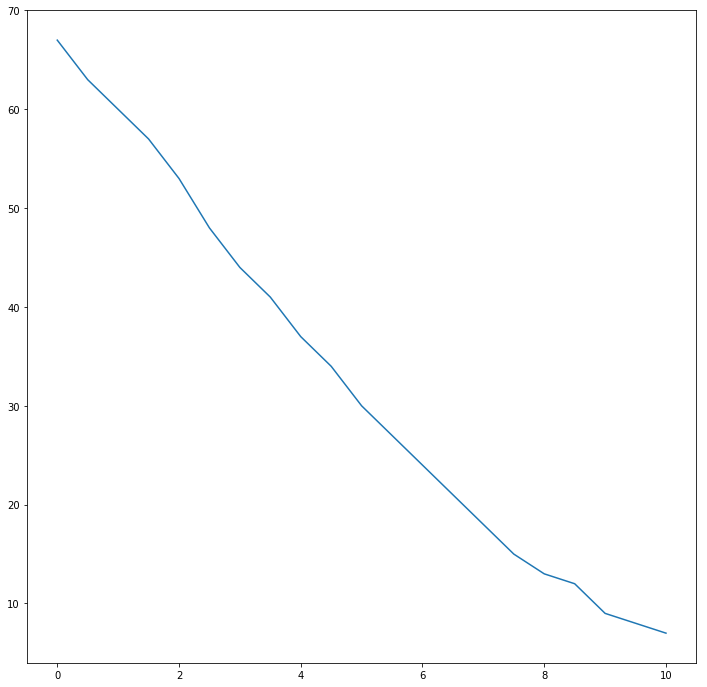

In [181]:
plot(mag, diameters)